# Exploration Lesson

### Goals:

- Can we see patterns, find signals in the data?

- What features are driving the outcome?

- Are there other features we can construct that have stronger relationships?

- Use visualization and statistical testing to help answer these questions.

- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods).

### Scenario:

We would like to be able to use attributes of customers to estimate their spending score. In doing so, we can target those customers that are likely to be most profitable for us. Our target variable is spending_score. Currently the only customer data we have available to use in this project is age, annual_income and gender. It is possible we may not have enough information to build a valuable model. If not, maybe we could do some unsupervised learning, and find clusters of similar customers using all of the variables (including spending_score) and that could help us with a starting point for our targeted marketing.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from env import gdb

## Acquire!

In [3]:
# df = pd.read_sql('SELECT * FROM customers;', get_db_url('mall_customers'))
df = gdb('mall_customers', 'SELECT * FROM customers')
df = df.set_index('customer_id')
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Prepare!

In [5]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe and splits the data into train, validate and test. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=seed)
    return train, validate, test

In [6]:
def scale_my_data(train, validate, test):
    '''
    scale my data using minmaxscaler and add it back to my input datasets
    '''
    scaler = MinMaxScaler()
    scaler.fit(train[['age', 'annual_income']])
    
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'annual_income_scaled']] = X_train_scaled
    validate[['age_scaled', 'annual_income_scaled']] = X_validate_scaled
    test[['age_scaled', 'annual_income_scaled']] = X_test_scaled
    return train, validate, test

In [7]:
def prep_mall(df):
    '''
    dummy var for gender into is_male
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    train, validate, test = train_validate_test_split(df, target='spending_score', seed=1349)
    train, validate, test = scale_my_data(train, validate, test)
    
    print(f'df: {df.shape}')
    print()
    print(f'train: {train.shape}')
    print(f'validate: {validate.shape}')
    print(f'test: {test.shape}')
    return df, train, validate, test

In [8]:
df, train, validate, test = prep_mall(df)

df: (200, 5)

train: (112, 7)
validate: (48, 7)
test: (40, 7)


In [9]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled
customer_id,,,,,,,
27,Female,45,28,32,0,0.519231,0.106557
24,Male,31,25,73,1,0.250000,0.081967
40,Female,20,37,75,0,0.038462,0.180328
38,Female,30,34,73,0,0.230769,0.155738
57,Female,51,44,50,0,0.634615,0.237705


## Explore!

1. Ask your question

2. Vizualize it

3. Perform a stats test, if needed

4. Write your takeaway

### Q1. What is the distribution of each variable?

Since I'm doing at univariate exploration, I can use the original dataset.

In [10]:
from wrangle_mvp import boxplots, hists, hr

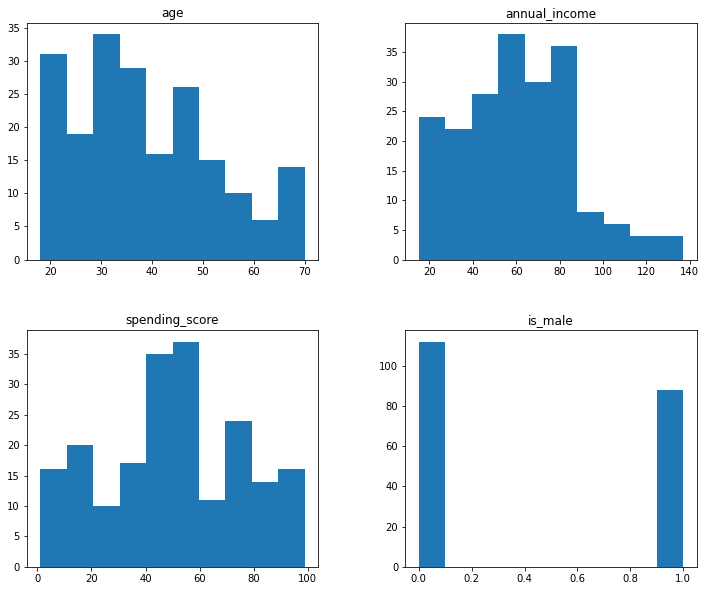

In [20]:
df.hist(grid=False, figsize=(12,10))
plt.show()

#### Takeaways

### Q2. Does the spending score differ across gender?

I am now comparing variables, so I HAVE to use the train dataset.

> what type of variable is spending_score?   
> what type of variable is gender? 

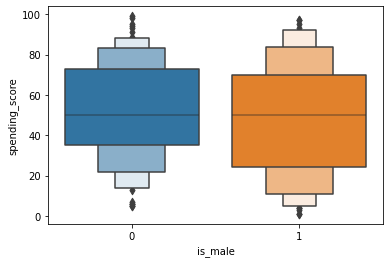

In [21]:
#barplot
sns.boxenplot(data=df,
              x=df.is_male,
              y=df.spending_score
             )
plt.show()

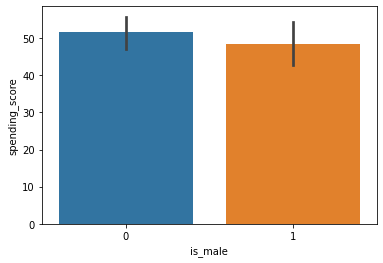

In [23]:
sns.barplot(x=df.is_male, y= df.spending_score)
plt.show()

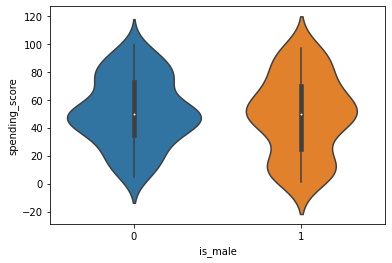

In [25]:
sns.violinplot(x=df.is_male, y= df.spending_score)
plt.show()

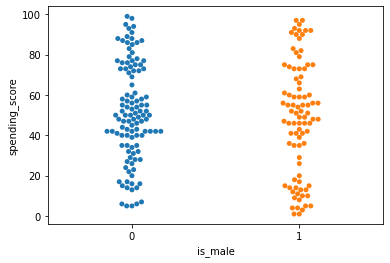

In [26]:
sns.swarmplot(x=df.is_male, y= df.spending_score)
plt.show()

Thoughts

Which stats test to use? 

In [29]:
train


,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled
customer_id,,,,,,,
27,Female,45,28,32,0,0.519231,0.106557
24,Male,31,25,73,1,0.250000,0.081967
40,Female,20,37,75,0,0.038462,0.180328
38,Female,30,34,73,0,0.230769,0.155738
57,Female,51,44,50,0,0.634615,0.237705
...,...,...,...,...,...,...,...
177,Male,58,88,15,1,0.769231,0.598361
195,Female,47,120,16,0,0.557692,0.860656
13,Female,58,20,15,0,0.769231,0.040984


In [32]:
r, p_value = stats.levene(train.spending_score[train.is_male == 1],
                          train.spending_score[train.is_male == 0]
                         )
α = .05

In [35]:
if p_value > α: print('we CANNOT reject our null H: The varience is similar')

we CANNOT reject our null H: The varience is similar


In [34]:
#stats.ttest_ind()
stats.ttest_ind(train[train.gender=='Male'].spending_score, 
                train[train.gender=='Female'].spending_score,
               equal_var=True)

Ttest_indResult(statistic=-0.2520372896728062, pvalue=0.8014825487089098)

#### Takeaway

### Looks like gender doesn't affect our target

### Q3. Is there a relationship between spending score and annual income?

> what type of variable is spending score?   
> what type of variable is annual income? 

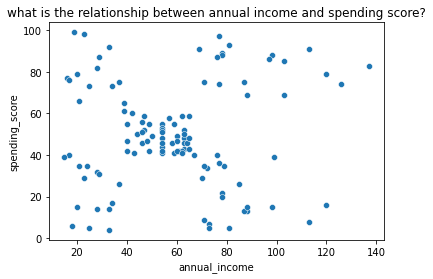

In [39]:
sns.scatterplot(x= train.annual_income,
                y= train.spending_score
               )

plt.title('what is the relationship between annual income and spending score?')
plt.show()

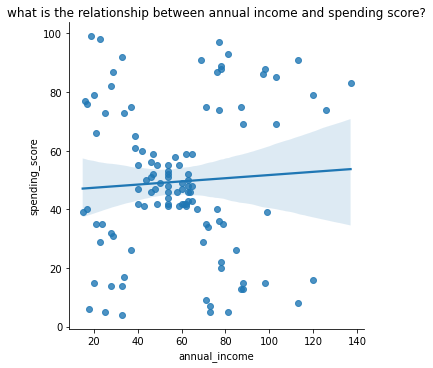

In [40]:
sns.lmplot(data=train,
           x= 'annual_income',
           y= 'spending_score',
               )

plt.title('what is the relationship between annual income and spending score?')
plt.show()

Thoughts

Which stats test to use? 


Spearmean R


In [41]:
#stats.spearmanr()
stats.spearmanr(train.annual_income, train.spending_score)

SpearmanrResult(correlation=0.0139166413882597, pvalue=0.8842097894086705)

### p-value is WAY over α!
1. No way these are linearly related... I mean, probably no anyway

#### Takeaways

### Q4. Is there a relationship between age and spending score? 

> what type of variable is age?    
> what type of variable is spending score? 

<Figure size 576x720 with 0 Axes>

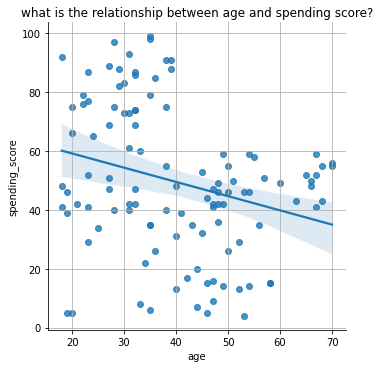

In [44]:
plt.figure(figsize=(8,10))
sns.lmplot(data = train,
           x= 'age',
           y= 'spending_score'
          )
plt.grid()
plt.title('what is the relationship between age and spending score?')
plt.show()

Thoughts

We'll use `pd.cut()` to make bins

In [48]:
#make new age_bin column
train['age_bins'] = pd.cut(train.age, (0,40,80), labels=('40_and_under', 'over_40'))

In [49]:
train.head()

,gender,age,annual_income,spending_score,is_male,age_scaled,annual_income_scaled,age_bins
customer_id,,,,,,,,
27,Female,45,28,32,0,0.519231,0.106557,over_40
24,Male,31,25,73,1,0.250000,0.081967,40_and_under
40,Female,20,37,75,0,0.038462,0.180328,40_and_under
38,Female,30,34,73,0,0.230769,0.155738,40_and_under
57,Female,51,44,50,0,0.634615,0.237705,over_40


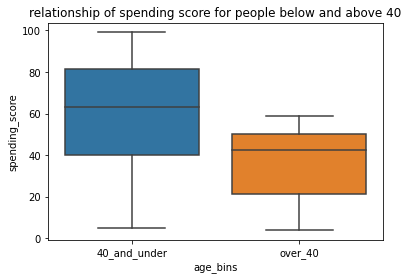

In [50]:
sns.boxplot(x= train.age_bins,
           y= train.spending_score)
plt.title('relationship of spending score for people below and above 40')
plt.show()

Which stats test to use? 


Levene test

In [51]:
train.age_bins.value_counts()

40_and_under    62
over_40         50
Name: age_bins, dtype: int64

In [52]:
train.dtypes

gender                    object
age                        int64
annual_income              int64
spending_score             int64
is_male                    uint8
age_scaled               float64
annual_income_scaled     float64
age_bins                category
dtype: object

In [53]:
#stats.levene
stats.levene(train.spending_score[train.age_bins == '40_and_under'],
             train.spending_score[train.age_bins == 'over_40']
            )

LeveneResult(statistic=15.352912166943206, pvalue=0.00015525914569012802)

> our pvalue is less than alpha, therefore we reject the null hypothesis and say our variances are not equal

In [55]:
import plotly.express as px

In [54]:
#stats.ttest_ind
stats.ttest_ind(train.spending_score[train.age_bins == '40_and_under'],
             train.spending_score[train.age_bins == 'over_40'],
                equal_var=False
               )

Ttest_indResult(statistic=5.292725484839427, pvalue=6.652618486151613e-07)

# The very low p-value suggests that: 
- we can reject the ~~Hₒ: The Means of the populations are the same~~
- Hₐ: The means of the 40 and under spending score and over 40 spending score are different


> our pvalue is less than alpha, therefore we reject the null hypothesis

In [60]:
px.scatter_3d(x=train.age,
              y= train.annual_income,
              z= train.spending_score,
              color= train.gender,
              labels={'x': 'Age',
                      'y': 'Income',
                      'z': 'Spending Score'
                     }
             )

#### Takeaway

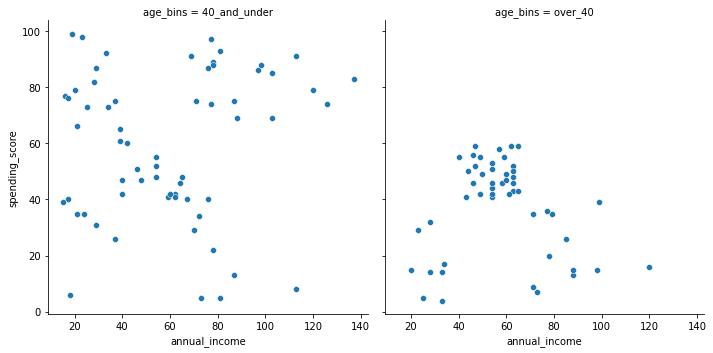

In [64]:
sns.relplot(data=train,
                x= 'annual_income',
                y= 'spending_score',
                col = 'age_bins'
               )

plt.show()

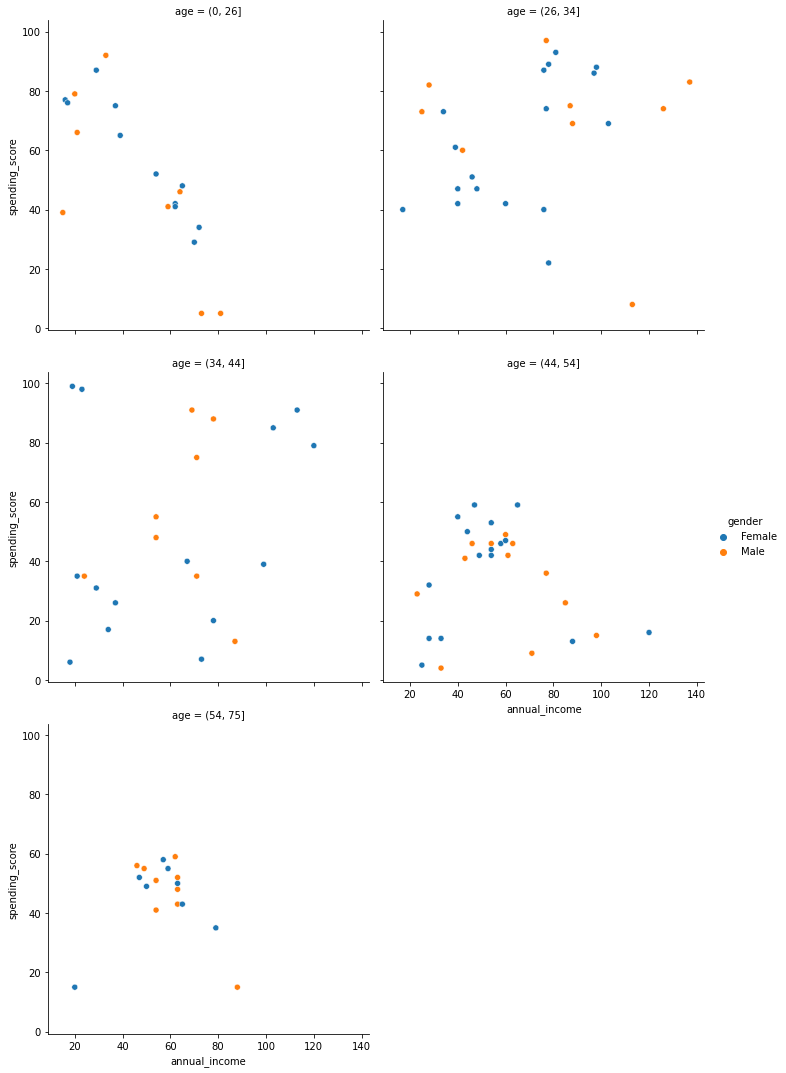

In [76]:
sns.relplot(data=train,
                x= 'annual_income',
                y= 'spending_score',
                col = pd.cut(train.age, (0,26,34,44,54,75)),
                hue='gender',
                col_wrap=2
               )

plt.show()

### Q. If we control for age, does spending score differ across annual income?

Use `sns.relplot` to control for variables

Thoughts


In [ ]:
#create age bins in col


# plt.suptitle("Do the different decades account for the upper vs lower extremes?")
# plt.tight_layout()

Thoughts

#### Does gender play a role?

In [ ]:

# plt.suptitle("Do the different decades account for the upper vs lower extremes?")
# plt.tight_layout()

Thoughts


#### Takeaways


### Q. If we control for annual income, does spending score differ across age?

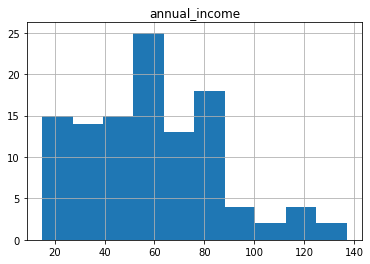

In [79]:
train.annual_income.hist()
plt.title('annual_income')
plt.show()

In [84]:
#make income_bin
train['income_bins'] = pd.cut(train.annual_income, (0,40,70,150),
                              labels=('0_40K',
                                      '40_70K',
                                      '70K+',
                                     )
                             )

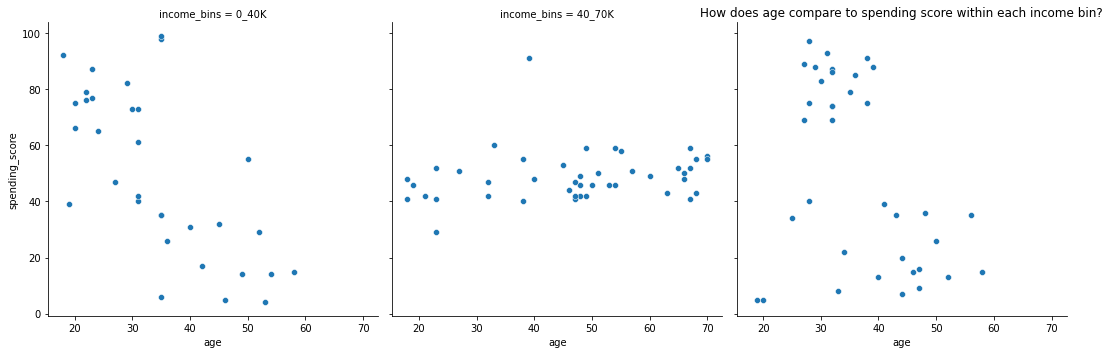

In [85]:
#plot it
sns.relplot(x= train.age,
            y= train.spending_score,
            col = train.income_bins,
            col_wrap= 3
           )
plt.title("How does age compare to spending score within each income bin?")
plt.show()

In [86]:
px.scatter_3d(x= train.age,
              y= train.income_bins,
              z= train.spending_score,
              color= train.gender
             )

Takeaways


### If you don't know where to start, start with pairplot

In [ ]:
# print("Interaction of variables along with income bins")

# plt.show()

In [ ]:
# print("Interaction of variables by gender")

# plt.show()

## Conclusion

